
# Is the price of hotel more expensive than other listings?

   ###   Hypothesis Testing  using NYC Airbnb data 

                            By Muluemebet Ayalew
                               March,2020

In [100]:
#Important libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 
%matplotlib inline

## Read the cleaned data 
This data has non zero price, none NaN for reviews_per_month. New features such as is_hotel, distance from some point of interest.

In [11]:
# read the cleaned data for further analysis
new_ny= pd.read_csv("NYC_cleaned.csv", parse_dates=["last_review"])

In [12]:
new_ny.shape # now the shape of the dataframe is changed


(50583, 22)

In [9]:
new_ny.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_hotel', 'location',
       'dist_nearest_SubwayStation', 'dist_nearest_SubwayEntrance',
       'dist_from_TimeSqr', 'dist_from_PennStation'],
      dtype='object')

## Is hotel expensive than other listings  ?
We are interested if the mean price of hotel and non hotel listings are statistically different. 

    

### Step 1:  Formulate the null and alternative hypothesis
    The null hypothesis: The mean price of hotel and non-hotel listings are the same in New York city
    Althernative hypothesis : The mean price of hotel is greater than the mean price of non-hotel listing in New York city


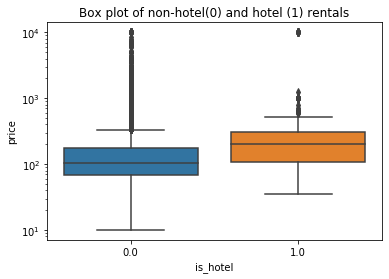

In [46]:
# Box plot of hotel and non hotel price
_=sns.boxplot("is_hotel", "price", data=new_ny)
_=plt.yscale("log")
_=plt.title("Box plot of non-hotel(0) and hotel (1) rentals")

In [54]:
#get rental price for hotel and non-hotel 
hotel=new_ny[new_ny.is_hotel==1]["price"]
not_hotel= new_ny[new_ny.is_hotel==0]["price"]

# compute the means
print("Hotel_mean_price = " , hotel.mean())
print("Not_hotel_mean_price = ", not_hotel.mean())

# standard deviation 
h_std=np.std(hotel)
nh_std= np.std(not_hotel)
print("Hotel_std = " , h_std)
print("Not_hotel_std = ", nh_std)

Hotel_mean_price =  554.4195933456562
Not_hotel_mean_price =  153.93855161664203
Hotel_std =  1714.0510120765289
Not_hotel_std =  298.37401113118864


### Step 2:  Define test statistics 
The formula for two smaple t-test assuming hotel and non-hotel rental price have the same variance is :

standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

Where; n0,n1, s0,s1,bar{x}_0,\bar{x}_1} are the number of observation, standard deviation and mean of group_0 and group_1, respectively.

### Step 3 : Check the assumption to use the test statistics

Inorder to use the above test statistic, the two groups(hotel and none-hotel rentals) should have the same variance. We need to test if the variance differerence for the two groups are statistically insignificant to use the above formula. 

Let us define another hypothesis to test if the variance of the two group is the same. Since variance is the square of standard deviation, we can define the hypothesis using standard deviation. If the two groups have the same variance they can also have the same standard deviation. 

    Null hypothesis: The standard deviations of listing price for hotel and non-hotel are the same
    Alternative Hypothesis: The standard deviation of listing price for hotel and non-hotel is the same(two taild)

In [55]:
def bs_repl(data, func, size):
    """ boostrap replicates of the statistics defined by 'func' from bootstraped samples of size equal to 'size'"""
    bs_replicate=np.empty(size)
    for i in range(size):
        bs_sample= np.random.choice(data, size=len(data)) #  the mean of bootstraped samples
        bs_replicate[i]=func(bs_sample)
    return bs_replicate


**Bootstraped  samples of standard deviation**

In [51]:
np.random.seed(47) # fix the seed to get the same result
N_rep = 10000
# bootstrap replicate of price for hotel 
bs_rep_hotel=bs_repl(hotel, np.std, N_rep) 

# bootstrap replicate of price for non-hotel 
bs_rep_nothotel= bs_repl(not_hotel, np.std, N_rep)
# differnce
bs_diff= bs_rep_hotel - bs_rep_nothotel

**Confidence interval, 95%**

In [57]:
# Compute 95% confidence interval, two-tailed test
conf_int = np.percentile(bs_diff,(2.5,97.5))
print("confidence interval = ", conf_int)

confidence interval =  [ 990.29721559 1782.66286541]


In [93]:
#observed standard deviation difference of the two groups
obsr_diff= h_std-nh_std
print("observed std_difference = ", obsr_diff)

observed std_difference =  1415.6770009453403


**Plot the bootstraped standard deviation**

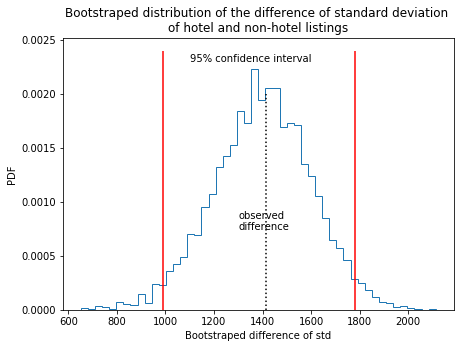

In [121]:
plt.figure(figsize=(7,5))

# plot the bootstraped difference of standard deviation , 95% confidence interval and observed difference
_=plt.hist(bs_diff, histtype="step", density=True, bins=50)
_=plt.vlines(conf_int, 0, 0.0024, colors="red")
_=plt.xlabel("Bootstraped difference of std")
_=plt.ylabel("PDF") # probablity density function
_=plt.title("Bootstraped distribution of the difference of standard deviation \nof hotel and non-hotel listings")
_=plt.vlines(obsr_diff,0, 0.002, linestyles="dotted") # observed difference
_=plt.annotate("observed\ndifference", (1300, 0.00074))
_=plt.annotate("95% confidence interval", (1100, 0.0023))

In [107]:
# compute p-value
p_value= np.sum(bs_diff> obsr_diff)/len(bs_diff) # proportion of observations above the observed difference
p_value

0.4736

The p-value is very large (>> 0.05(the significance leve)).The p-value the probablity to get an outcome at least as extreme as what was observed. Therefore, the difference of standard devation of price for hotel and none-hotel listing is statistically not significant. We can accept the null hypothesis and assume that the two groups have the same variance.  

## Step 4: Choose the significance level  
The significance level, $\alpha$, is set as 0.05(5%). If the p-value is smaller than the significance leve, the null hypothesis is rejected and alternative hypothesis is accepted. Else p-value is larger, the null hypothesis will be accepted.

##  Step 4 : Calculate the test statistics

Use the equation in step 2 to compute the test statistics. 

In [102]:
n0= len(hotel) # number of hotel listings 
n1= len(not_hotel) # number of none-hotel listings

m0= hotel.mean()    # mean price of hotel listing
m1=not_hotel.mean() # mean price of 
sp=np.sqrt(((n0-1)*h_std**2 +(n1-1)*nh_std**2)/(n0+n1-2)) # pooled standard deviation 
t_value= (m0-m1)/(sp*np.sqrt((1/n0) + (1/n1))) # t-value
print("t_value =", t_value)

t_value = 26.80814104107958


### Interpretation

With (n0+n1-2)= (541+50042-2)= 50581 degree of freedom , 5% significance level and one tailed test we can get the t-score of 1.6449. If it was two tailed test, the t-score would be +/-1.96. The calculated t-value(~26.808) is very large and the probablity to get t-scores above this point is very very small.Therefore, the the difference in mean price between hotel and non-hotel listing is statistically significant. We can also proof this using scipy.stats module. Please note that the p-value computed using the stats method ttest_ind_from_stats() is based on two-tailed test.

In [103]:
stats.ttest_ind_from_stats(m0,h_std,n0,m1,nh_std,n1)  # p-value for two tailed test

Ttest_indResult(statistic=26.80814104107958, pvalue=3.279534172257377e-157)

##  Bootstrapped Hypothesis test
Another way to test the hypothesis defined above.

### Step1: Formulate the null and alternative hypohesis :
 It is the same as defined above.
 
    The null hypothesis: The mean price of hotel and non-hotel listings are the same in New York city
    Althernative hypothesis : The mean price of hotel is greater than the mean price of non-hotel listing in New York city


### Step 2 : Set the significance level
The significance level,  𝛼 , is set as 0.05(5%) the same as the earlier test.

### Step 3: Compute the mean of a concatenated array of the two groups
To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [123]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((hotel, not_hotel)))

### Step 4: Shift the two groups data to get the same mean
Shift hotel and non- hotel listing to get the same mean as the concatinated datahotel and non- hotel listing to get the same mean as the concatinated data

In [124]:
# Shift the samples
hotel_shifted = hotel -np.mean(hotel)+ combined_mean
nothotel_shifted = not_hotel - np.mean(not_hotel) + combined_mean

### Step 5: Get bootstrap replicates of shifted data sets
Take 10,000 bootstrap replicates,bootstrap replicates are the statistics computed from resampled array(in this case mean), of the mean for each hotel and non-hotel listing.

In [126]:
# Get bootstrap replicates of shifted data sets
bs_replicates_hotel = bs_repl(hotel_shifted, np.mean,10000)
bs_replicates_nothotel = bs_repl(nothotel_shifted, np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_hotel - bs_replicates_nothotel


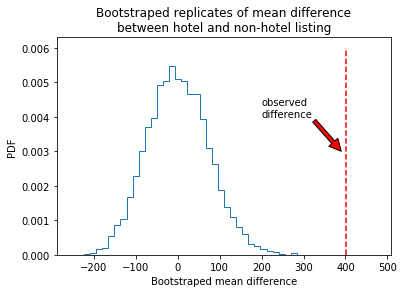

In [160]:
_=plt.hist(bs_diff_replicates, bins=50, density=True, histtype="step")
_=plt.vlines((np.mean(hotel)-np.mean(not_hotel)), 0,0.006, colors="red", linestyles="dashed") # observed mean difference
_=plt.annotate("observed\ndifference", xytext=(200, 0.004), xy=(390,0.003),arrowprops=dict(facecolor='red'))
_=plt.xlabel("Bootstraped mean difference")
_=plt.ylabel("PDF")
_=plt.title("Bootstraped replicates of mean difference\nbetween hotel and non-hotel listing")


 ### Step 6: Compute the p-value

In [145]:
# Compute the p-value
p = np.sum(bs_diff_replicates >= (np.mean(hotel)-np.mean(not_hotel))) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0001


#### Interpretation 
The p- value(0.0001) is less than the prespecified significal level(0.05). Therefore, the mean price difference between hotel and non-hotel listing is statistically significant. Hotel listing is more expensive than other listing. 